In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
file_path = '/Users/sanjitteja/Desktop/ML/Attrition_data.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

# Display the DataFrame
print(df.head())

   S.No    EmpID Emp Name        DOJ                 Designation Grade  \
0     1  XYZ2685     ABC1  22-Nov-10             Sales Executive    E1   
1     2  XYZ2490     ABC2  05-Jul-10  Technical Services Officer    M2   
2     3  XYZ2662     ABC3  20-Oct-10             Sales Executive    E1   
3     4  XYZ1679     ABC4  01-May-08                  AM - Sales    M1   
4     5  XYZ2378     ABC5  03-Mar-10            Sales Executive     E1   

  Attrition        Location In Active Date  Tenure  ...  \
0        Yes      Bhavnagar      26-May-12   1. 6   ...   
1        Yes      Jayanagar      06-Apr-12   1. 9   ...   
2        Yes         Indore      07-Apr-12   1. 5   ...   
3        Yes  Admin Gujarat      03-Apr-12  3 .11   ...   
4        Yes   Jagdishpuram      10-Apr-12   2 .1   ...   

                                          Remarks lower location  DoubtFul  \
0                         Issues with the Manager      bhavnagar        NO   
1  More Challenging Job Roles/ Higher design

Dataframe offers a tabular structure

In [110]:
df.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,Issues with the Manager,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,...,More Challenging Job Roles/ Higher designation,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th..."
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,...,Issues with the Manager,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,Lack of Growth,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,Issues with the Manager,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th..."


In [111]:
df['DoubtFul'].value_counts()

DoubtFul
NO     297
YES     28
Name: count, dtype: int64

In [112]:
df.drop(['S.No', 'EmpID', 'Attrition ', 'Emp Name', 'Location', 'DOJ', 'In Active Date'], axis = 1, inplace = True)

In [113]:
df.isna().sum()

Designation                            0
Grade                                  0
Tenure                                 0
Gender                                 0
Education                              0
Age                                    0
Last Rating                            0
Monthly Income                         0
Engagement Score (% Satisfaction)      0
Marital Status                         0
Zone                                   0
Remarks                                0
lower location                         2
DoubtFul                               2
Fixed Location                         2
Changed                                0
location_remarks                     170
City/District                         33
State                                 20
zone_lower                             0
state_remarks                        319
dtype: int64

In [114]:
df.shape

(327, 21)

In [115]:
df['Zone'].unique()

array(['West', 'South', 'CENTRAL', 'North', 'SOUTH', 'NORTH', 'East',
       'HO', 'Central'], dtype=object)

Features of Zone have different notations of same value, So tried to merge same values

In [116]:
df.loc[df['Zone'] == 'South', 'Zone'] = 'SOUTH'
df.loc[df['Zone'] == 'Central', 'Zone'] = 'CENTRAL'
df.loc[df['Zone'] == 'North', 'Zone'] = 'NORTH'

In [117]:
df['Zone'].unique()

array(['West', 'SOUTH', 'CENTRAL', 'NORTH', 'East', 'HO'], dtype=object)

In [118]:
df['Remarks'].unique()

array(['Issues with the Manager',
       'More Challenging Job Roles/ Higher designation', 'Lack of Growth',
       'Better Salary', 'Absconding', 'Termination - Theft',
       'Reasons not known', 'Higher education', 'Health Reasons',
       'Termination - Poor Performance'], dtype=object)

Remarks is a valuable feature, it is important to include in the data but it has lot of remark values 

In [119]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: count, dtype: int64

Some of the small instances of Remark values can be exculded from the data, So that it could be easy to encode the feature

In [120]:
exclude_values = ['Absconding', 'Termination - Theft', 'Health Reasons', 'Higher education', 'Reasons not known']

df = df[~df['Remarks'].isin(exclude_values)]

In [121]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Name: count, dtype: int64

In [122]:
df['Designation'].value_counts()

Designation
Sales Executive               171
Sales Executive                37
Technical Services Officer     26
Sr Sales Executive             23
AM - Sales                     22
Sr Sales Executive             10
 Sales Executive                7
Regional Manager                4
Zonal Manager                   3
National Sales Head             1
Name: count, dtype: int64

Similar to remarks designation also have a lot of Unneccesary values

Exculded all the small no.of instances

In [123]:
exclude_values = ['National Sales Head', 'Zonal Manager']

df = df[~df['Designation'].isin(exclude_values)]

In [124]:
df['Designation'].value_counts()

Designation
Sales Executive               171
Sales Executive                37
Technical Services Officer     26
Sr Sales Executive             23
AM - Sales                     22
Sr Sales Executive             10
 Sales Executive                7
Regional Manager                4
Name: count, dtype: int64

In [125]:
df.shape

(300, 21)

In [126]:
df['Engagement Score'] = df['Engagement Score (% Satisfaction)'].str.rstrip('%').astype(int)


df.drop(columns=['Engagement Score (% Satisfaction)'], inplace=True)

Feature engagement score is an String with '%' symbol, So converted it into a integer by stripping off the symbol

In [127]:
df['Tenure']

0       1. 6 
1       1. 9 
2       1. 5 
3      3 .11 
4       2 .1 
        ...  
322     4 .9 
323     0. 5 
324     7 .3 
325     8 .8 
326     0. 0 
Name: Tenure, Length: 300, dtype: object

In [128]:
df['Tenure'] = df['Tenure'].str.replace(' ', '')

df['Tenure'] = df['Tenure'].astype(float).round().astype(int)


In [129]:
df['Tenure']

0      2
1      2
2      2
3      3
4      2
      ..
322    5
323    0
324    7
325    9
326    0
Name: Tenure, Length: 300, dtype: int64

feature tenure contains some string whilst representing strings like '3. 10'. Converted them into integers

In [130]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,Sales Executive,E1,2,Female,Bachelors,27,4,25535,Divorced,West,...,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,Technical Services Officer,M2,2,Male,MBA,36,2,52155,Single,SOUTH,...,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,Sales Executive,E1,2,Male,Bachelors,24,4,26438,Divorced,CENTRAL,...,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN,18
3,AM - Sales,M1,3,Male,Bachelors,33,2,54311,Single,West,...,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN,82
4,Sales Executive,E1,2,Male,Bachelors,24,4,26702,Divorced,NORTH,...,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [131]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for feature in ['Designation', 'Gender', 'Education', 'Marital Status', 'Zone', 'Remarks', 'DoubtFul', 'Changed']:
    df[feature] = LE.fit_transform(df[feature])
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,3,E1,2,0,0,27,4,25535,0,5,...,bhavnagar,0,bhavnagar,0,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,7,M2,2,1,1,36,2,52155,2,4,...,jayanagar,1,jayanagar,0,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,3,E1,2,1,0,24,4,26438,0,0,...,indore,0,indore,0,NaN,indore,madhya pradesh,central,NaN,18
3,1,M1,3,1,0,33,2,54311,2,5,...,admin gujarat,0,admin gujarat,0,NaN,NaN,gujarat,west,NaN,82
4,4,E1,2,1,0,24,4,26702,0,3,...,jagdishpuram,1,jagdishpuram,0,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [135]:
df['Grade'].unique()

array(['E1', 'M2', 'M1', 'E2', 'M3'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['E1','E2','M1', 'M2', 'M3']])

df['Grade'] = encoder.fit_transform(df[['Grade']])

Ordinal Encoding for the feature Grade to differentiate between Grades of the employees which also introduce ordinality in the data

In [ ]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,3,0.0,2,0,0,27,4,25535,0,5,...,bhavnagar,0,bhavnagar,0,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,7,3.0,2,1,1,36,2,52155,2,4,...,jayanagar,1,jayanagar,0,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,3,0.0,2,1,0,24,4,26438,0,0,...,indore,0,indore,0,NaN,indore,madhya pradesh,central,NaN,18
3,1,2.0,3,1,0,33,2,54311,2,5,...,admin gujarat,0,admin gujarat,0,NaN,NaN,gujarat,west,NaN,82
4,4,0.0,2,1,0,24,4,26702,0,3,...,jagdishpuram,1,jagdishpuram,0,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 326
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Designation       300 non-null    int64  
 1   Grade             300 non-null    float64
 2   Tenure            300 non-null    int64  
 3   Gender            300 non-null    int64  
 4   Education         300 non-null    int64  
 5   Age               300 non-null    int64  
 6   Last Rating       300 non-null    int64  
 7   Monthly Income    300 non-null    int64  
 8   Marital Status    300 non-null    int64  
 9   Zone              300 non-null    int64  
 10  Remarks           300 non-null    int64  
 11  lower location    298 non-null    object 
 12  DoubtFul          300 non-null    int64  
 13  Fixed Location    298 non-null    object 
 14  Changed           300 non-null    int64  
 15  location_remarks  147 non-null    object 
 16  City/District     271 non-null    object 
 17  St

In [ ]:
df.shape

(300, 21)

In [ ]:
df.drop(['lower location', 'Fixed Location', 'location_remarks', 'City/District', 'State', 'zone_lower', 'state_remarks'], axis = 1, inplace=True)

Correlation matrix to find out the feature importance 

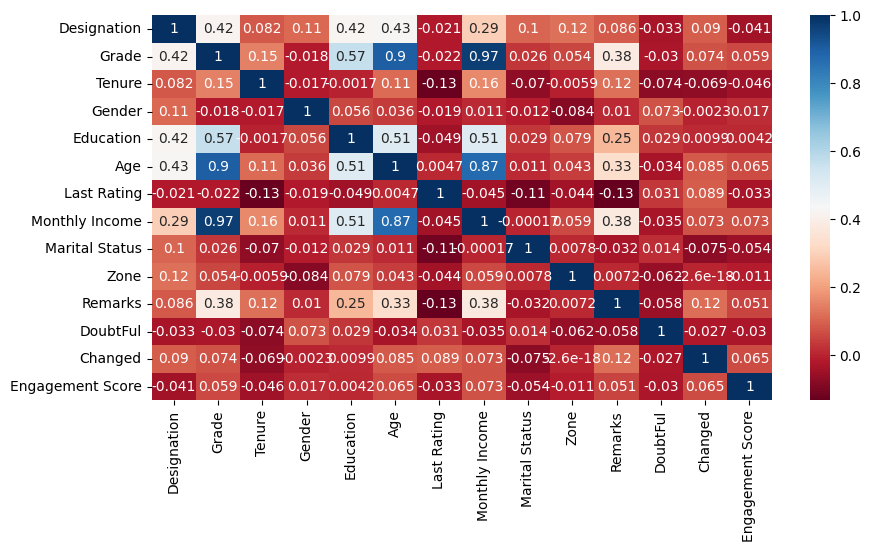

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

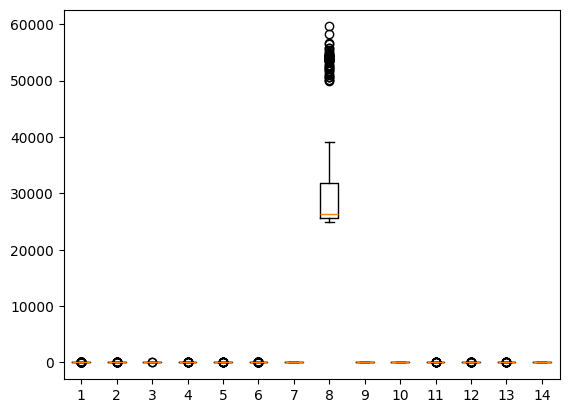

In [ ]:
plt.boxplot(df)
plt.show()


In [ ]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,Remarks,DoubtFul,Changed,Engagement Score
0,3,0.0,2,0,0,27,4,25535,0,5,1,0,0,2
1,7,3.0,2,1,1,36,2,52155,2,4,3,1,0,45
2,3,0.0,2,1,0,24,4,26438,0,0,1,0,0,18
3,1,2.0,3,1,0,33,2,54311,2,5,2,0,0,82
4,4,0.0,2,1,0,24,4,26702,0,3,1,1,0,49


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Tenure', axis = 1)
y = df['Tenure']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.5
R^2 Score: -0.012536162005786


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50],
    'ccp_alpha': np.linspace(0, 20, num=20)
}


grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_regressor = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

path = regressor.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas

mse_scores = []

for ccp_alpha in ccp_alphas:
    regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    regressor_pruned.fit(X_train_scaled, y_train)
    y_pred = regressor_pruned.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

best_ccp_alpha = ccp_alphas[np.argmin(mse_scores)]
print(f'Best ccp_alpha: {best_ccp_alpha}')

final_regressor = DecisionTreeRegressor(
    random_state=42,
    max_depth=3, 
    min_samples_split=2, 
    min_samples_leaf=10, 
    max_leaf_nodes=None, 
    ccp_alpha=20
)
final_regressor.fit(X_train_scaled, y_train)

scores = cross_val_score(final_regressor, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

final_y_pred = final_regressor.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_y_pred)
print(f'Final Mean Squared Error: {final_mse}')

Best Parameters: {'ccp_alpha': np.float64(0.0), 'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ccp_alpha: 0.07111111111111106
Cross-validation scores: [-0.01964953 -0.0009715  -0.00029481 -0.02431023 -0.05384845]
Average cross-validation score: -0.019814904822242553
Final Mean Squared Error: 3.4666666666666672


1. Trained the model using Decision Tree
2. Observed Overfitting
3. Tried RandomForest
4. Tried KFold
5. Tried Pre-Pruning
6. Tried Post-Pruning
7. Tried Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, final_y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, final_y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = mean_squared_error(y_test, final_y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, final_y_pred)
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 1.4733333333333334
Mean Squared Error (MSE): 3.4666666666666672
Root Mean Squared Error (RMSE): 1.8618986725025257
R-squared (R2): -0.002892960462874017


/Users/sanjitteja/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
valPred = final_regressor.predict(X_val)
mseVal = mean_squared_error(y_val, valPred)
print(mseVal)

3.5466666666666673
